#Dataset Description

\

## The dataset contains information about road traffic accidents with the following columns:

`Time`: Time of the accident

`Day_of_week`: Day of the week when the accident occurred

`Age_band_of_driver`: Age group of the driver

`Sex_of_driver`: Gender of the driver

`Educational_level`: Educational level of the driver

`Vehicle_driver_relation`: Relationship of the driver to the vehicle

`Driving_experience`: Driving experience of the driver

`Type_of_vehicle`: Type of vehicle involved in the accident

`Owner_of_vehicle`: Owner of the vehicle

`Service_year_of_vehicle`: Service years of the vehicle

`Area_accident_occured`: Area where the accident occurred

`Lanes_or_Medians`: Lanes or medians at the accident site

`Road_allignment`: Road alignment at the accident site

`Types_of_Junction`: Type of junction at the accident site

`Road_surface_type`: Type of road surface at the accident site

`Road_surface_conditions`: Road surface conditions at the accident site

`Light_conditions`: Light conditions at the time of the accident

`Weather_conditions`: Weather conditions at the time of the accident

`Type_of_collision`: Type of collision

`Number_of_vehicles_involved`: Number of vehicles involved in the accident

`Number_of_casualties`: Number of casualties in the accident

`Vehicle_movement`: Movement of the vehicle during the accident

`Casualty_class`: Class of casualty (driver, passenger, pedestrian)

`Sex_of_casualty`: Gender of the casualty

`Age_band_of_casualty`: Age group of the casualty

`Casualty_severity`: Severity of the casualty

`Work_of_casuality`: Occupation of the casualty

`Fitness_of_casuality`: Fitness of the casualty

`Pedestrian_movement`: Movement of the pedestrian

`Cause_of_accident`: Cause of the accident

`Accident_severity`: Severity of the accident


# Tasks

##1. Data Cleaning

### Read the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [182]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt


In [127]:
df = pd.read_csv('/content/drive/MyDrive/exam week 1 SDAIA Zeham/Task 1/Task (1) Dataset.csv')

In [128]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


### Handle Missing Values

In [129]:
df['Sex_of_driver'].value_counts()

Sex_of_driver
Male       11437
Female       701
Unknown      178
Name: count, dtype: int64

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [131]:
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [132]:
df['Educational_level'].fillna(df['Educational_level'].mode()[0], axis = 0 , inplace =True)
df['Vehicle_driver_relation'].fillna(df.Vehicle_driver_relation.mode()[0], axis = 0 , inplace =True)
df['Driving_experience'].fillna(df.Driving_experience.mode()[0], axis = 0 , inplace =True)
df['Type_of_vehicle'].fillna(df.Vehicle_driver_relation.mode()[0], axis = 0 , inplace =True)
df['Owner_of_vehicle'].fillna(df.Owner_of_vehicle.mode()[0], axis = 0 , inplace =True)
df['Service_year_of_vehicle'].fillna(df.Service_year_of_vehicle.mode()[0], axis = 0 , inplace =True)
df['Defect_of_vehicle'].fillna(df.Defect_of_vehicle.mode()[0], axis = 0 , inplace =True)
df['Area_accident_occured'].fillna(df.Area_accident_occured.mode()[0], axis = 0 , inplace =True)
df['Lanes_or_Medians'].fillna(df.Lanes_or_Medians.mode()[0], axis = 0 , inplace =True)
df['Road_allignment'].fillna(df.Road_allignment.mode()[0], axis = 0 , inplace =True)
df['Types_of_Junction'].fillna(df.Types_of_Junction.mode()[0], axis = 0 , inplace =True)
df['Road_surface_type'].fillna(df.Road_surface_type.mode()[0], axis = 0 , inplace =True)
df['Type_of_collision'].fillna(df.Type_of_collision.mode()[0], axis = 0 , inplace =True)
df['Vehicle_movement'].fillna(df.Vehicle_movement.mode()[0], axis = 0 , inplace =True)
df['Work_of_casuality'].fillna(df.Work_of_casuality.mode()[0], axis = 0 , inplace =True)
df['Fitness_of_casuality'].fillna(df.Fitness_of_casuality.mode()[0], axis = 0 , inplace =True)


In [133]:
df.isnull().sum()

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Service_year_of_vehicle        0
Defect_of_vehicle              0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Work_of_casuality              0
Fitness_of_casuality           0
Pedestrian_movement            0
Cause_of_a

### Correct any inconsistent data entries.

In [134]:
df.dtypes

Time                           object
Day_of_week                    object
Age_band_of_driver             object
Sex_of_driver                  object
Educational_level              object
Vehicle_driver_relation        object
Driving_experience             object
Type_of_vehicle                object
Owner_of_vehicle               object
Service_year_of_vehicle        object
Defect_of_vehicle              object
Area_accident_occured          object
Lanes_or_Medians               object
Road_allignment                object
Types_of_Junction              object
Road_surface_type              object
Road_surface_conditions        object
Light_conditions               object
Weather_conditions             object
Type_of_collision              object
Number_of_vehicles_involved     int64
Number_of_casualties            int64
Vehicle_movement               object
Casualty_class                 object
Sex_of_casualty                object
Age_band_of_casualty           object
Casualty_sev

In [152]:
df['Time']=pd.to_datetime(df['Time'])

<ipython-input-152-ca8834d81e24>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time']=pd.to_datetime(df['Time'])


### Ensure data types are appropriate for each column.

---



In [154]:
df.dtypes

Time                           datetime64[ns]
Day_of_week                            object
Age_band_of_driver                     object
Sex_of_driver                          object
Educational_level                      object
Vehicle_driver_relation                object
Driving_experience                     object
Type_of_vehicle                        object
Owner_of_vehicle                       object
Service_year_of_vehicle                object
Defect_of_vehicle                      object
Area_accident_occured                  object
Lanes_or_Medians                       object
Road_allignment                        object
Types_of_Junction                      object
Road_surface_type                      object
Road_surface_conditions                object
Light_conditions                       object
Weather_conditions                     object
Type_of_collision                      object
Number_of_vehicles_involved             int64
Number_of_casualties              

## 2. Exploratory Data Analysis (EDA)

### Perform summary statistics on the dataset.

In [157]:
df.shape

(12316, 32)

In [156]:
df.describe()

,Time,Number_of_vehicles_involved,Number_of_casualties
count,12316,12316.000000,12316.000000
mean,2024-07-25 14:17:50.768106496,2.040679,1.548149
min,2024-07-25 00:01:00,1.000000,1.000000
25%,2024-07-25 10:31:00,2.000000,1.000000
50%,2024-07-25 15:10:00,2.000000,1.000000
75%,2024-07-25 18:10:00,2.000000,2.000000
max,2024-07-25 23:59:00,7.000000,8.000000
std,NaN,0.688790,1.007179


In [159]:
df['Number_of_vehicles_involved'].max()

7

In [160]:
df['Number_of_vehicles_involved'].min()

1

In [162]:
df['Number_of_casualties'].mean()

1.548148749594024

In [164]:
df['Number_of_casualties'].max()

8

In [165]:
df['Number_of_casualties'].min()

1

### Identify and analyze patterns in the data.

In [168]:
df.groupby('Day_of_week')['Day_of_week'].count()

Day_of_week
Friday       2041
Monday       1681
Saturday     1666
Sunday       1467
Thursday     1851
Tuesday      1770
Wednesday    1840
Name: Day_of_week, dtype: int64

In [169]:
df.groupby(['Day_of_week','Accident_severity'])['Day_of_week'].count()

Day_of_week  Accident_severity
Friday       Fatal injury           16
             Serious Injury        313
             Slight Injury        1712
Monday       Fatal injury           12
             Serious Injury        204
             Slight Injury        1465
Saturday     Fatal injury           37
             Serious Injury        245
             Slight Injury        1384
Sunday       Fatal injury           35
             Serious Injury        190
             Slight Injury        1242
Thursday     Fatal injury           22
             Serious Injury        272
             Slight Injury        1557
Tuesday      Fatal injury           17
             Serious Injury        257
             Slight Injury        1496
Wednesday    Fatal injury           19
             Serious Injury        262
             Slight Injury        1559
Name: Day_of_week, dtype: int64

In [172]:
df.groupby(['Light_conditions','Weather_conditions'])['Weather_conditions'].count()

Light_conditions         Weather_conditions
Darkness - lights lit    Cloudy                  52
                         Fog or mist              2
                         Normal                2454
                         Other                  126
                         Raining                506
                         Raining and Windy       26
                         Snow                     8
                         Unknown                 68
                         Windy                   44
Darkness - lights unlit  Normal                  30
                         Raining                  9
                         Windy                    1
Darkness - no lighting   Cloudy                  12
                         Normal                 115
                         Other                    2
                         Raining                 39
                         Snow                     6
                         Unknown                 12
                    

In [173]:
df.groupby(['Cause_of_accident','Vehicle_movement'])['Vehicle_movement'].count()

Cause_of_accident          Vehicle_movement   
Changing lane to the left  Entering a junction      19
                           Getting off              43
                           Going straight         1000
                           Moving Backward         132
                           Other                   117
                                                  ... 
Turnover                   Reversing                 5
Unknown                    Entering a junction       1
                           Going straight           22
                           Turnover                  1
                           Unknown                   1
Name: Vehicle_movement, Length: 202, dtype: int64

In [181]:
df.groupby(['Day_of_week']).agg(
    avg_vehicles_num =('Number_of_vehicles_involved','mean'),
    max_vehicles_num = ('Number_of_vehicles_involved','max'),
    min_vehicles_num= ('Number_of_vehicles_involved','min'),
    avg_casualties =('Number_of_casualties','mean') ,
    max_casualties = ('Number_of_casualties','max') ,
    min_casualties = ('Number_of_casualties','min')
)

,avg_vehicles_num,max_vehicles_num,min_vehicles_num,avg_casualties,max_casualties,min_casualties
Day_of_week,,,,,,
Friday,2.034297,6,1,1.540421,6,1
Monday,2.033908,4,1,1.529447,7,1
Saturday,2.065426,6,1,1.648259,8,1
Sunday,2.053851,6,1,1.844581,7,1
Thursday,2.014587,6,1,1.470016,6,1
Tuesday,2.068362,7,1,1.462147,6,1
Wednesday,2.020652,6,1,1.408152,6,1


### Visualize the distribution of key variables (e.g., Age_band_of_driver, Type_of_vehicle).

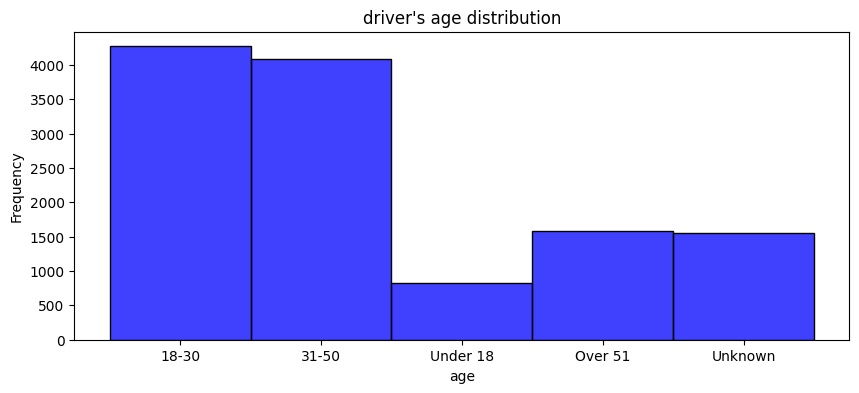

In [224]:
plt.figure(figsize=(10,4))
sns.histplot(data = df['Age_band_of_driver']  , bins = 20 , color = 'blue' )
plt.title("driver's age distribution")
plt.xlabel('age')
plt.ylabel('Frequency')
plt.show()

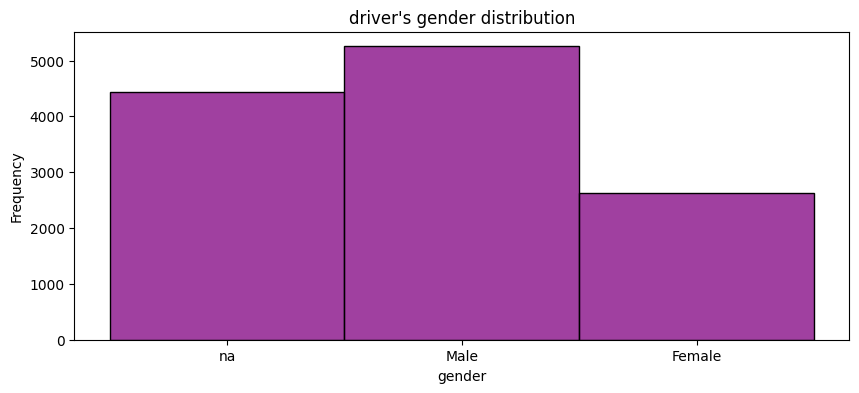

In [225]:
plt.figure(figsize=(10,4))
sns.histplot(data = df['Sex_of_casualty']  , bins = 20 , color = 'purple' )
plt.title("driver's gender distribution")
plt.xlabel('gender')
plt.ylabel('Frequency')
plt.show()

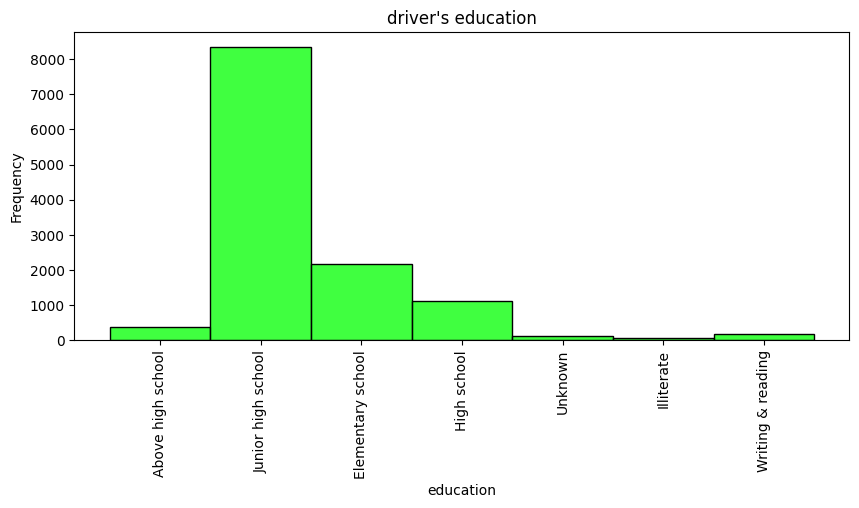

In [228]:
plt.figure(figsize=(10,4))
sns.histplot(data = df['Educational_level']  , bins = 20 , color = 'lime' )
plt.title("driver's education")
plt.xlabel('education')
plt.ylabel('Frequency')
plt.xticks(rotation=90)

plt.show()

### Explore relationships between variables (e.g., Age_band_of_driver vs. Accident_severity).


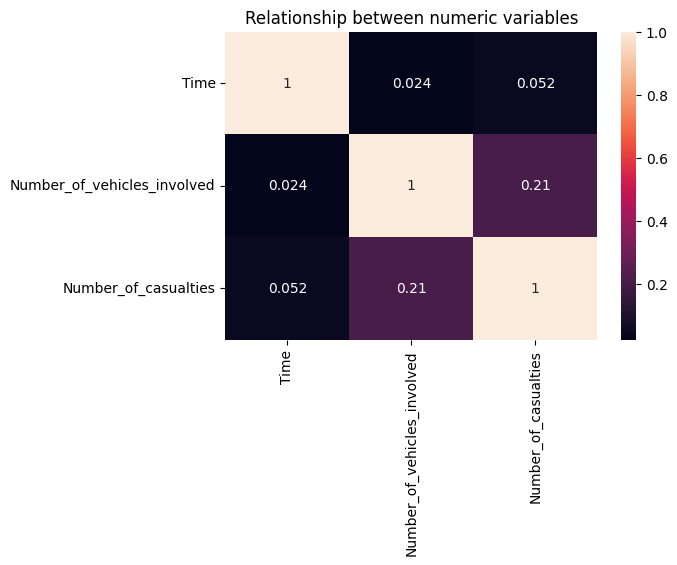

In [185]:
plt.figure(figsize=(6,4))
matrix=df.select_dtypes(exclude=['object'])
sns.heatmap(matrix.corr() , robust= True , annot =True , cmap='rocket')
plt.title('Relationship between numeric variables')
plt.show()

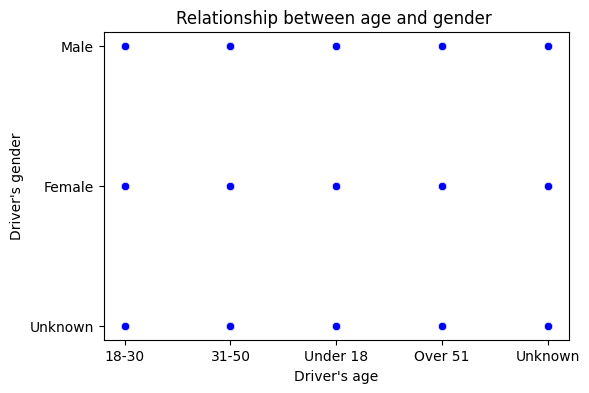

In [191]:
plt.figure(figsize=(6,4))
sns.scatterplot(df , x = 'Age_band_of_driver' , y = 'Sex_of_driver' , color = 'blue')
plt.title('Relationship between age and gender ')
plt.xlabel("Driver's age")
plt.ylabel("Driver's gender")
plt.show()

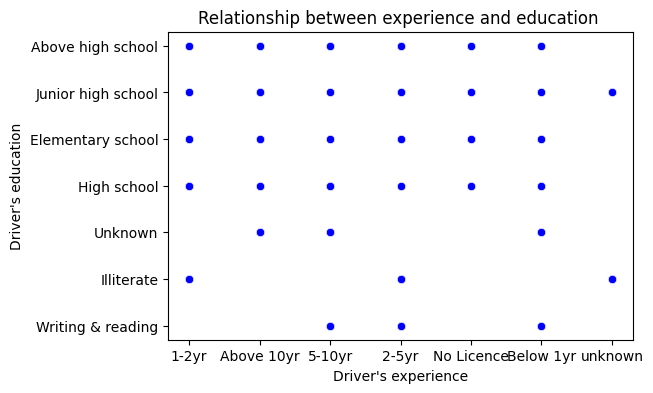

In [192]:
plt.figure(figsize=(6,4))
sns.scatterplot(df , x = 'Driving_experience' , y = 'Educational_level' , color = 'blue')
plt.title('Relationship between experience and education ')
plt.xlabel("Driver's experience")
plt.ylabel("Driver's education")
plt.show()

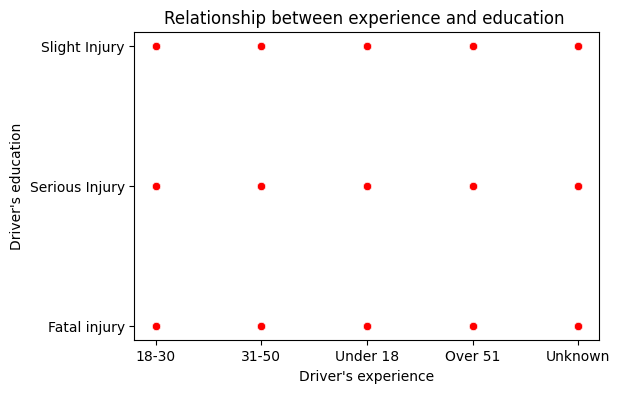

In [195]:
plt.figure(figsize=(6,4))
sns.scatterplot(df , x = 'Age_band_of_driver' , y = 'Accident_severity' , color = 'red')
plt.title('Relationship between experience and education ')
plt.xlabel("Driver's experience")
plt.ylabel("Driver's education")
plt.show()

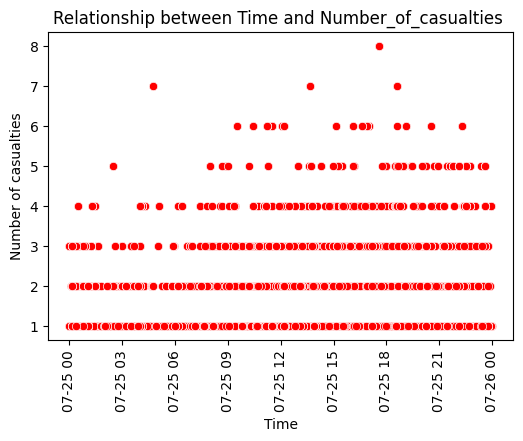

In [231]:
plt.figure(figsize=(6,4))
sns.scatterplot(df , x = 'Time' , y = 'Number_of_casualties' , color = 'red')
plt.title('Relationship between Time and Number_of_casualties ')
plt.xlabel("Time")
plt.ylabel("Number of casualties")
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)


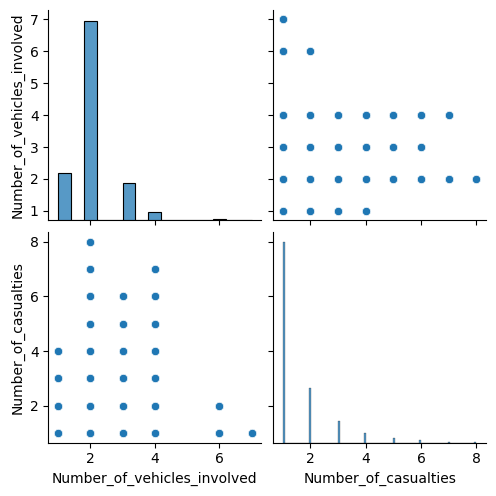

In [196]:
sns.pairplot(matrix ,
             palette ='blue',
             kind ='scatter')
plt.show()

## 3. Data Visualization

<ipython-input-235-a6d5dd4128c6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, y='Number_of_vehicles_involved', palette='muted')


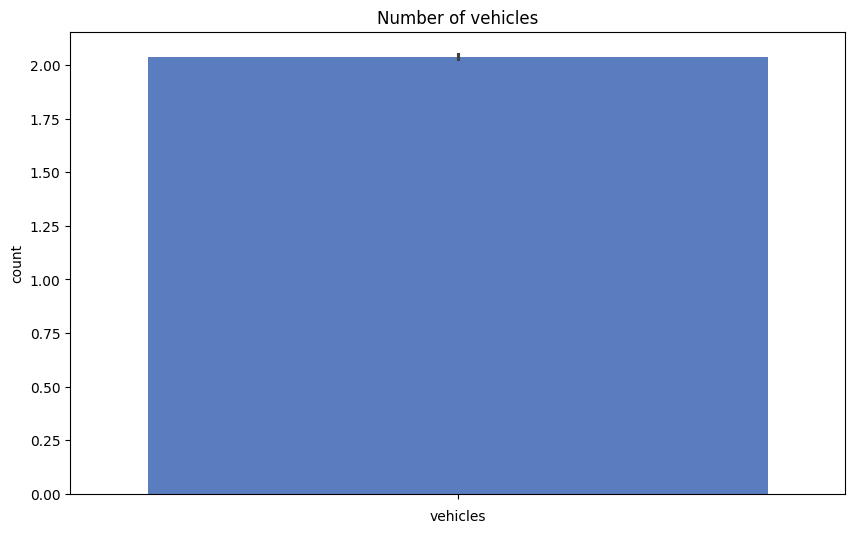

In [235]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, y='Number_of_vehicles_involved', palette='muted')
plt.title('Number of vehicles')
plt.xlabel('vehicles')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.show()

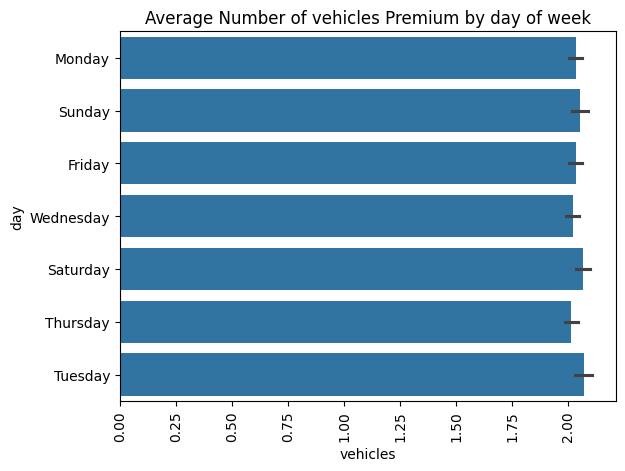

In [206]:
sns.barplot(data = df, x="Number_of_vehicles_involved", y="Day_of_week")
plt.title('Average Number of vehicles Premium by day of week')
plt.xlabel('vehicles')
plt.ylabel('day')
plt.xticks(rotation=90)
plt.show()

* Ensure the visualizations are clear and informative.

### Create visualizations to illustrate the findings from the EDA.


<Axes: xlabel='Day_of_week', ylabel='count'>

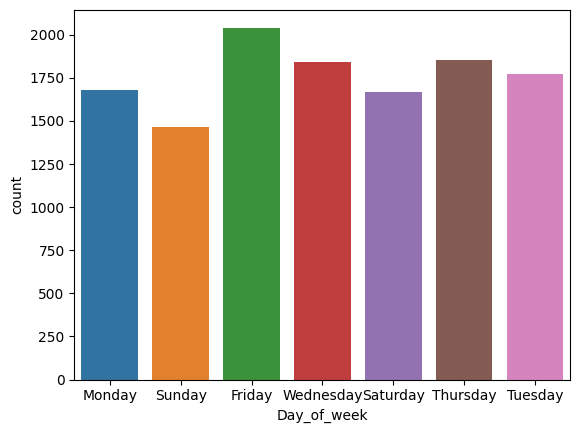

In [213]:
sns.countplot(df, x='Day_of_week', hue='Day_of_week')

### Use appropriate plots such as histograms, bar charts, pie charts, scatter plots, and heatmaps.

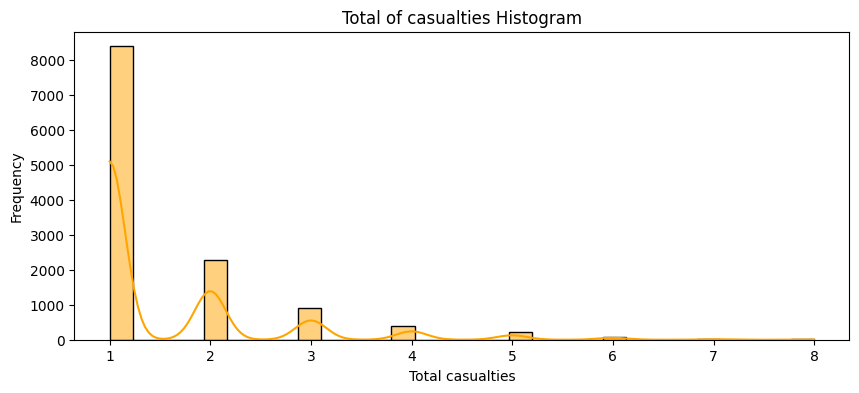

In [218]:
plt.figure(figsize=(10,4))
sns.histplot(data = df['Number_of_casualties'] , kde = True , bins = 30 , color = 'orange' )
plt.title('Total of casualties Histogram')
plt.xlabel('Total casualties')
plt.ylabel('Frequency')
plt.show()

## 4. Insights and Conclusions

* <h3>Summarize the key insights gained from the data analysis.<h3/>
* <h3>Draw conclusions based on the patterns observed in the data.<h3/>

***many variables had missing values, largest is Defect_of_vehicle.***
***date were converted to datetime from object.***
***max number of cajualties was 8 and min was 1.***
***driver's age distribution is left-skewed.***
***gender has a normal distribution.***\
***highest accidents came from people with junior high school distribution and least was from literate.***
***there is no strong relationship between numeric variables as shown in heat map.***
***average number of vehicles involved was 2.***
***highest accident avg came from tuesday.***
***highest accident count came from friday by 2000.***